# NETFLIX 분석
### ======================== 1. 장르별 성 분석 - 영화, 드라마, 예능, 애니메이션 ========================
##### 1) 영화 -------------------------------------------------------------------------------------------------------------------------------

In [175]:
import pandas as pd
import numpy as np

DIR='../DATA/'

# 데이터 불러오기
movie_female=pd.read_excel(DIR+'넷플릭스 영화_여성.xlsx', names=['date', 'movie_female'], skiprows=6)
movie_male=pd.read_excel(DIR+'넷플릭스 영화_남성.xlsx', names=['date', 'movie_male'], skiprows=6)

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [153]:
movie_female.head()

,date,movie_female
0,2019-01-01,70.00321
1,2019-01-02,40.73579
2,2019-01-03,39.52675
3,2019-01-04,45.40184
4,2019-01-05,57.49518


In [44]:
movie_male.head()

,date,movie_male
0,2019-01-01,71.25644
1,2019-01-02,40.62377
2,2019-01-03,38.65465
3,2019-01-04,46.80493
4,2019-01-05,65.74567


In [45]:
# 합치기
movie=movie_female.merge(movie_male)
movie.head()

,date,movie_female,movie_male
0,2019-01-01,70.00321,71.25644
1,2019-01-02,40.73579,40.62377
2,2019-01-03,39.52675,38.65465
3,2019-01-04,45.40184,46.80493
4,2019-01-05,57.49518,65.74567


In [46]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1276
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1277 non-null   object 
 1   movie_female  1277 non-null   float64
 2   movie_male    1277 non-null   float64
dtypes: float64(2), object(1)
memory usage: 39.9+ KB


In [47]:
# date 컬럼의 자료형을 datetime로 바꿔주기
movie['date']=pd.to_datetime(movie['date'])

In [48]:
# 제대로 바뀌었는지 자료형 확인
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1276
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1277 non-null   datetime64[ns]
 1   movie_female  1277 non-null   float64       
 2   movie_male    1277 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 39.9 KB


In [49]:
# 년, 월 추출해서 컬럼 추가
movie['year']=movie['date'].dt.year
movie['month']=movie['date'].dt.month
#movie['day']=movie['date'].dt.day   일은 필요없을 것 같아서 뺐음

In [50]:
movie

,date,movie_female,movie_male,year,month
0,2019-01-01,70.00321,71.25644,2019,1
1,2019-01-02,40.73579,40.62377,2019,1
2,2019-01-03,39.52675,38.65465,2019,1
3,2019-01-04,45.40184,46.80493,2019,1
4,2019-01-05,57.49518,65.74567,2019,1
...,...,...,...,...,...
1272,2022-06-26,35.86458,36.72071,2022,6
1273,2022-06-27,27.31951,26.18198,2022,6
1274,2022-06-28,26.27182,24.92809,2022,6
1275,2022-06-29,30.55385,28.48974,2022,6


In [128]:
# 2019년의 여성, 남성 월별 영화 검색량 평균 담는 리스트
movie_f_month_2019=[]
movie_m_month_2019=[]

# 2020년의 여성, 남성 월별 영화 검색량 평균 담는 리스트
movie_f_month_2020=[]
movie_m_month_2020=[]

# 2021년의 여성, 남성 월별 영화 검색량 평균 담는 리스트
movie_f_month_2021=[]
movie_m_month_2021=[]

# 2022년의 여성, 남성 월별 영화 검색량 평균 담는 리스트
movie_f_month_2022=[]
movie_m_month_2022=[]

# 2019~2022년의 월별 영화 검색량 평균 담는 리스트
movie_f=[]
movie_m=[]


def movie_year():
    for i in range(1, 13):
        movie_f_month_2019.append(movie[(movie['month']==i)&(movie['year']==2019)]['movie_female'].mean())
        movie_m_month_2019.append(movie[(movie['month']==i)&(movie['year']==2019)]['movie_male'].mean())
        movie_f.append(movie[(movie['month']==i)&(movie['year']==2019)]['movie_female'].mean())
        movie_m.append(movie[(movie['month']==i)&(movie['year']==2019)]['movie_male'].mean())

    for i in range(1, 13):
        movie_f_month_2020.append(movie[(movie['month']==i)&(movie['year']==2020)]['movie_female'].mean())
        movie_m_month_2020.append(movie[(movie['month']==i)&(movie['year']==2020)]['movie_male'].mean())
        movie_f.append(movie[(movie['month']==i)&(movie['year']==2020)]['movie_female'].mean())
        movie_m.append(movie[(movie['month']==i)&(movie['year']==2020)]['movie_male'].mean())

    for i in range(1, 13):
        movie_f_month_2021.append(movie[(movie['month']==i)&(movie['year']==2021)]['movie_female'].mean())
        movie_m_month_2021.append(movie[(movie['month']==i)&(movie['year']==2021)]['movie_male'].mean())
        movie_f.append(movie[(movie['month']==i)&(movie['year']==2021)]['movie_female'].mean())
        movie_m.append(movie[(movie['month']==i)&(movie['year']==2021)]['movie_male'].mean())

    for i in range(1, 7):
        movie_f_month_2022.append(movie[(movie['month']==i)&(movie['year']==2022)]['movie_female'].mean())
        movie_m_month_2022.append(movie[(movie['month']==i)&(movie['year']==2022)]['movie_male'].mean())
        movie_f.append(movie[(movie['month']==i)&(movie['year']==2022)]['movie_female'].mean())
        movie_m.append(movie[(movie['month']==i)&(movie['year']==2022)]['movie_male'].mean())

movie_year()

##### 2) 드라마 ------------------------------------------------------------------------------------------------

In [59]:
DIR='../DATA/'

drama_female=pd.read_excel(DIR+'넷플릭스 드라마_여성.xlsx', names=['date', 'drama_female'], skiprows=6)
drama_male=pd.read_excel(DIR+'넷플릭스 드라마_남성.xlsx', names=['date', 'drama_male'], skiprows=6)

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [177]:
drama_female.head()

,date,drama_female
0,2019-01-01,67.50990
1,2019-01-02,61.99939
2,2019-01-03,50.99359
3,2019-01-04,48.36025
4,2019-01-05,45.57756


In [178]:
drama_male.head()

,date,drama_male
0,2019-01-01,61.61217
1,2019-01-02,60.82245
2,2019-01-03,48.11479
3,2019-01-04,42.07155
4,2019-01-05,44.94149


In [179]:
drama=drama_female.merge(drama_male)
drama.head()

,date,drama_female,drama_male
0,2019-01-01,67.50990,61.61217
1,2019-01-02,61.99939,60.82245
2,2019-01-03,50.99359,48.11479
3,2019-01-04,48.36025,42.07155
4,2019-01-05,45.57756,44.94149


In [63]:
drama.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1276
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1277 non-null   object 
 1   drama_female  1277 non-null   float64
 2   drama_male    1277 non-null   float64
dtypes: float64(2), object(1)
memory usage: 39.9+ KB


In [64]:
drama['date']=pd.to_datetime(drama['date'])

In [65]:
drama.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1276
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1277 non-null   datetime64[ns]
 1   drama_female  1277 non-null   float64       
 2   drama_male    1277 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 39.9 KB


In [66]:
drama['year']=drama['date'].dt.year
drama['month']=drama['date'].dt.month

In [131]:
# 2019년의 드라마 여성, 남성 월별 평균 담는 리스트
drama_f_month_2019=[]
drama_m_month_2019=[]

# 2020년의 드라마 여성, 남성 월별 평균 담는 리스트
drama_f_month_2020=[]
drama_m_month_2020=[]

# 2021년의 드라마 여성, 남성 월별 평균 담는 리스트
drama_f_month_2021=[]
drama_m_month_2021=[]

# 2022년의 드라마 여성, 남성 월별 평균 담는 리스트
drama_f_month_2022=[]
drama_m_month_2022=[]

# 2019~2022년의 드라마 월별 평균 담는 리스트
drama_f=[]
drama_m=[]


def drama_year():
    for i in range(1, 13):
        drama_f_month_2019.append(drama[(drama['month']==i)&(drama['year']==2019)]['drama_female'].mean())
        drama_m_month_2019.append(drama[(drama['month']==i)&(drama['year']==2019)]['drama_male'].mean())
        drama_f.append(drama[(drama['month']==i)&(drama['year']==2019)]['drama_female'].mean())
        drama_m.append(drama[(drama['month']==i)&(drama['year']==2019)]['drama_male'].mean())
        
    for i in range(1, 13):
        drama_f_month_2020.append(drama[(drama['month']==i)&(drama['year']==2020)]['drama_female'].mean())
        drama_m_month_2020.append(drama[(drama['month']==i)&(drama['year']==2020)]['drama_male'].mean())
        drama_f.append(drama[(drama['month']==i)&(drama['year']==2020)]['drama_female'].mean())
        drama_m.append(drama[(drama['month']==i)&(drama['year']==2020)]['drama_male'].mean())

    for i in range(1, 13):
        drama_f_month_2021.append(drama[(drama['month']==i)&(drama['year']==2021)]['drama_female'].mean())
        drama_m_month_2021.append(drama[(drama['month']==i)&(drama['year']==2021)]['drama_male'].mean())
        drama_f.append(drama[(drama['month']==i)&(drama['year']==2021)]['drama_female'].mean())
        drama_m.append(drama[(drama['month']==i)&(drama['year']==2021)]['drama_male'].mean())

    for i in range(1, 7):
        drama_f_month_2022.append(drama[(drama['month']==i)&(drama['year']==2022)]['drama_female'].mean())
        drama_m_month_2022.append(drama[(drama['month']==i)&(drama['year']==2022)]['drama_male'].mean())
        drama_f.append(drama[(drama['month']==i)&(drama['year']==2022)]['drama_female'].mean())
        drama_m.append(drama[(drama['month']==i)&(drama['year']==2022)]['drama_male'].mean())

drama_year()

##### 3) 예능 -------------------------------------------------------------------------------------------------------------------

In [75]:
DIR='../DATA/'

enter_female=pd.read_excel(DIR+'넷플릭스 예능_여성.xlsx', names=['date', 'enter_female'], skiprows=6)
enter_male=pd.read_excel(DIR+'넷플릭스 예능_남성.xlsx', names=['date', 'enter_male'], skiprows=6)

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [76]:
enter_female.head()

,date,enter_female
0,2019-01-01,65.79710
1,2019-01-02,59.56521
2,2019-01-03,55.50724
3,2019-01-04,61.93236
4,2019-01-05,59.13043


In [77]:
enter_male.head()

,date,enter_male
0,2019-01-01,77.14497
1,2019-01-02,65.45857
2,2019-01-03,60.57692
3,2019-01-04,65.82840
4,2019-01-05,75.44378


In [78]:
enter=enter_female.merge(enter_male)
enter

,date,enter_female,enter_male
0,2019-01-01,65.79710,77.14497
1,2019-01-02,59.56521,65.45857
2,2019-01-03,55.50724,60.57692
3,2019-01-04,61.93236,65.82840
4,2019-01-05,59.13043,75.44378
...,...,...,...
1272,2022-06-26,45.31400,43.86094
1273,2022-06-27,51.44927,42.52958
1274,2022-06-28,54.10628,45.93195
1275,2022-06-29,48.26086,43.93491


In [79]:
enter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1276
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1277 non-null   object 
 1   enter_female  1277 non-null   float64
 2   enter_male    1277 non-null   float64
dtypes: float64(2), object(1)
memory usage: 39.9+ KB


In [80]:
enter['date']=pd.to_datetime(enter['date'])

In [81]:
enter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1276
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1277 non-null   datetime64[ns]
 1   enter_female  1277 non-null   float64       
 2   enter_male    1277 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 39.9 KB


In [82]:
enter['year']=enter['date'].dt.year
enter['month']=enter['date'].dt.month

In [132]:
# 2019년의 예능 여성, 남성 월별 평균 담는 리스트
enter_f_month_2019=[]
enter_m_month_2019=[]

# 2020년의 예능 여성, 남성 월별 평균 담는 리스트
enter_f_month_2020=[]
enter_m_month_2020=[]

# 2021년의 예능 여성, 남성 월별 평균 담는 리스트
enter_f_month_2021=[]
enter_m_month_2021=[]

# 2022년의 예능 여성, 남성 월별 평균 담는 리스트
enter_f_month_2022=[]
enter_m_month_2022=[]

# 2019~2022년의 예능 월별 평균 담는 리스트
enter_f=[]
enter_m=[]


def enter_year():
    for i in range(1, 13):
        enter_f_month_2019.append(enter[(enter['month']==i)&(enter['year']==2019)]['enter_female'].mean())
        enter_m_month_2019.append(enter[(enter['month']==i)&(enter['year']==2019)]['enter_male'].mean())
        enter_f.append(enter[(enter['month']==i)&(enter['year']==2019)]['enter_female'].mean())
        enter_m.append(enter[(enter['month']==i)&(enter['year']==2019)]['enter_male'].mean())
        
    for i in range(1, 13):
        enter_f_month_2020.append(enter[(enter['month']==i)&(enter['year']==2020)]['enter_female'].mean())
        enter_m_month_2020.append(enter[(enter['month']==i)&(enter['year']==2020)]['enter_male'].mean())
        enter_f.append(enter[(enter['month']==i)&(enter['year']==2020)]['enter_female'].mean())
        enter_m.append(enter[(enter['month']==i)&(enter['year']==2020)]['enter_male'].mean())

    for i in range(1, 13):
        enter_f_month_2021.append(enter[(enter['month']==i)&(enter['year']==2021)]['enter_female'].mean())
        enter_m_month_2021.append(enter[(enter['month']==i)&(enter['year']==2021)]['enter_male'].mean())
        enter_f.append(enter[(enter['month']==i)&(enter['year']==2021)]['enter_female'].mean())
        enter_m.append(enter[(enter['month']==i)&(enter['year']==2021)]['enter_male'].mean())

    for i in range(1, 7):
        enter_f_month_2022.append(enter[(enter['month']==i)&(enter['year']==2022)]['enter_female'].mean())
        enter_m_month_2022.append(enter[(enter['month']==i)&(enter['year']==2022)]['enter_male'].mean())
        enter_f.append(enter[(enter['month']==i)&(enter['year']==2022)]['enter_female'].mean())
        enter_m.append(enter[(enter['month']==i)&(enter['year']==2022)]['enter_male'].mean())

enter_year()

##### 애니메이션 ----------------------------------------------------------------------------------------------------------------------

In [89]:
import pandas as pd

DIR='../DATA/'

ani_female=pd.read_excel(DIR+'넷플릭스 애니메이션_여성.xlsx', names=['date', 'ani_female'], skiprows=6)
ani_male=pd.read_excel(DIR+'넷플릭스 애니메이션_남성.xlsx', names=['date', 'ani_male'], skiprows=6)

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [90]:
ani_female.head()

,date,ani_female
0,2019-01-01,100.00000
1,2019-01-02,79.96702
2,2019-01-03,79.38994
3,2019-01-04,82.76999
4,2019-01-05,82.93487


In [91]:
ani_male.head()

,date,ani_male
0,2019-01-01,100.00000
1,2019-01-02,62.32294
2,2019-01-03,59.06515
3,2019-01-04,69.40509
4,2019-01-05,84.98583


In [92]:
ani=ani_female.merge(ani_male)
ani

,date,ani_female,ani_male
0,2019-01-01,100.00000,100.00000
1,2019-01-02,79.96702,62.32294
2,2019-01-03,79.38994,59.06515
3,2019-01-04,82.76999,69.40509
4,2019-01-05,82.93487,84.98583
...,...,...,...
1272,2022-06-26,39.65375,44.90084
1273,2022-06-27,40.23083,30.45325
1274,2022-06-28,37.26298,41.07648
1275,2022-06-29,39.81863,33.71104


In [93]:
ani.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1276
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1277 non-null   object 
 1   ani_female  1277 non-null   float64
 2   ani_male    1277 non-null   float64
dtypes: float64(2), object(1)
memory usage: 39.9+ KB


In [94]:
ani['date']=pd.to_datetime(ani['date'])

In [95]:
ani.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1276
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1277 non-null   datetime64[ns]
 1   ani_female  1277 non-null   float64       
 2   ani_male    1277 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 39.9 KB


In [96]:
ani['year']=ani['date'].dt.year
ani['month']=ani['date'].dt.month

In [133]:
# 2019년의 애니메이션 여성, 남성 월별 평균 담는 리스트
ani_f_month_2019=[]
ani_m_month_2019=[]

# 2020년의 애니메이션 여성, 남성 월별 평균 담는 리스트
ani_f_month_2020=[]
ani_m_month_2020=[]

# 2021년의 애니메이션 여성, 남성 월별 평균 담는 리스트
ani_f_month_2021=[]
ani_m_month_2021=[]

# 2022년의 애니메이션 여성, 남성 월별 평균 담는 리스트
ani_f_month_2022=[]
ani_m_month_2022=[]

# 2019~2022년의 애니메이션 월별 평균 담는 리스트
ani_f=[]
ani_m=[]


def ani_year():
    for i in range(1, 13):
        ani_f_month_2019.append(ani[(ani['month']==i)&(ani['year']==2019)]['ani_female'].mean())
        ani_m_month_2019.append(ani[(ani['month']==i)&(ani['year']==2019)]['ani_male'].mean())
        ani_f.append(ani[(ani['month']==i)&(ani['year']==2019)]['ani_female'].mean())
        ani_m.append(ani[(ani['month']==i)&(ani['year']==2019)]['ani_male'].mean())
        
    for i in range(1, 13):
        ani_f_month_2020.append(ani[(ani['month']==i)&(ani['year']==2020)]['ani_female'].mean())
        ani_m_month_2020.append(ani[(ani['month']==i)&(ani['year']==2020)]['ani_male'].mean())
        ani_f.append(ani[(ani['month']==i)&(ani['year']==2020)]['ani_female'].mean())
        ani_m.append(ani[(ani['month']==i)&(ani['year']==2020)]['ani_male'].mean())

    for i in range(1, 13):
        ani_f_month_2021.append(ani[(ani['month']==i)&(ani['year']==2021)]['ani_female'].mean())
        ani_m_month_2021.append(ani[(ani['month']==i)&(ani['year']==2021)]['ani_male'].mean())
        ani_f.append(ani[(ani['month']==i)&(ani['year']==2021)]['ani_female'].mean())
        ani_m.append(ani[(ani['month']==i)&(ani['year']==2021)]['ani_male'].mean())

    for i in range(1, 7):
        ani_f_month_2022.append(ani[(ani['month']==i)&(ani['year']==2022)]['ani_female'].mean())
        ani_m_month_2022.append(ani[(ani['month']==i)&(ani['year']==2022)]['ani_male'].mean())
        ani_f.append(ani[(ani['month']==i)&(ani['year']==2022)]['ani_female'].mean())
        ani_m.append(ani[(ani['month']==i)&(ani['year']==2022)]['ani_male'].mean())

ani_year()

### =========================== 2. 연령대별 플랫폼 이용 추이 데이터 ===========================

In [103]:
# 연령대별 데이터 불러오기
DIR='../DATA/'

under_18=pd.read_excel(DIR+'넷플릭스 18세 이하.xlsx', skiprows=6, names=['date', 'under_18'])
age_20s=pd.read_excel(DIR+'넷플릭스 20대.xlsx', skiprows=6, names=['date', 'age_20s'])
age_30s=pd.read_excel(DIR+'넷플릭스 30대.xlsx', skiprows=6, names=['date', 'age_30s'])
age_40s=pd.read_excel(DIR+'넷플릭스 40대.xlsx', skiprows=6, names=['date', 'age_40s'])
age_50s=pd.read_excel(DIR+'넷플릭스 50대.xlsx', skiprows=6, names=['date', 'age_50s'])
over_60=pd.read_excel(DIR+'넷플릭스 60세 이상.xlsx', skiprows=6, names=['date', 'over_60'])

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains

In [180]:
# 데이터 확인하기
under_18.head()

,date,under_18
0,2019-01-01,26.81089
1,2019-01-02,21.39391
2,2019-01-03,19.40750
3,2019-01-04,17.20988
4,2019-01-05,20.02397


In [105]:
age_20s.head()

,date,age_20s
0,2019-01-01,34.04317
1,2019-01-02,30.29115
2,2019-01-03,29.08287
3,2019-01-04,27.57038
4,2019-01-05,30.22928


In [106]:
age_30s.head()

,date,age_30s
0,2019-01-01,21.28873
1,2019-01-02,17.92706
2,2019-01-03,17.61082
3,2019-01-04,17.37318
4,2019-01-05,19.22858


In [107]:
age_40s.head()

,date,age_40s
0,2019-01-01,15.03462
1,2019-01-02,13.71726
2,2019-01-03,13.88227
3,2019-01-04,13.94178
4,2019-01-05,14.95888


In [108]:
age_50s.head()

,date,age_50s
0,2019-01-01,10.70626
1,2019-01-02,10.05195
2,2019-01-03,10.57155
3,2019-01-04,10.38552
4,2019-01-05,11.38623


In [109]:
over_60.head()

,date,over_60
0,2019-01-01,8.92313
1,2019-01-02,9.43683
2,2019-01-03,7.59132
3,2019-01-04,9.81735
4,2019-01-05,9.28462


In [110]:
# concat으로 붙일 거라서 행 수가 모두 같은지 확인
under_18.shape, age_20s.shape, age_30s.shape, age_40s.shape, age_50s.shape, over_60.shape

((1277, 2), (1277, 2), (1277, 2), (1277, 2), (1277, 2), (1277, 2))

In [115]:
# 데이터 합치기
netflix=pd.concat([under_18, age_20s['age_20s'], age_30s['age_30s'], age_40s['age_40s'], 
                   age_50s['age_50s'], over_60['over_60']], axis=1)
netflix

,date,under_18,age_20s,age_30s,age_40s,age_50s,over_60
0,2019-01-01,26.81089,34.04317,21.28873,15.03462,10.70626,8.92313
1,2019-01-02,21.39391,30.29115,17.92706,13.71726,10.05195,9.43683
2,2019-01-03,19.40750,29.08287,17.61082,13.88227,10.57155,7.59132
3,2019-01-04,17.20988,27.57038,17.37318,13.94178,10.38552,9.81735
4,2019-01-05,20.02397,30.22928,19.22858,14.95888,11.38623,9.28462
...,...,...,...,...,...,...,...
1272,2022-06-26,15.40613,27.19913,25.88611,28.78976,30.40605,27.35920
1273,2022-06-27,10.58850,25.92038,26.10364,32.70937,34.44736,30.74581
1274,2022-06-28,9.54963,23.66539,23.86984,30.85100,33.65193,30.46042
1275,2022-06-29,10.59992,23.08617,24.07275,29.67701,33.04252,28.34855


In [116]:
# 요약 정보 확인
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1277 non-null   object 
 1   under_18  1277 non-null   float64
 2   age_20s   1277 non-null   float64
 3   age_30s   1277 non-null   float64
 4   age_40s   1277 non-null   float64
 5   age_50s   1277 non-null   float64
 6   over_60   1277 non-null   float64
dtypes: float64(6), object(1)
memory usage: 70.0+ KB


In [117]:
# date 컬럼을 datetime 형식으로 변환
netflix['date']=pd.to_datetime(netflix['date'])

In [118]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1277 non-null   datetime64[ns]
 1   under_18  1277 non-null   float64       
 2   age_20s   1277 non-null   float64       
 3   age_30s   1277 non-null   float64       
 4   age_40s   1277 non-null   float64       
 5   age_50s   1277 non-null   float64       
 6   over_60   1277 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 70.0 KB


In [119]:
# 년, 월 추출
netflix['year']=netflix['date'].dt.year
netflix['month']=netflix['date'].dt.month

In [120]:
netflix

,date,under_18,age_20s,age_30s,age_40s,age_50s,over_60,year,month
0,2019-01-01,26.81089,34.04317,21.28873,15.03462,10.70626,8.92313,2019,1
1,2019-01-02,21.39391,30.29115,17.92706,13.71726,10.05195,9.43683,2019,1
2,2019-01-03,19.40750,29.08287,17.61082,13.88227,10.57155,7.59132,2019,1
3,2019-01-04,17.20988,27.57038,17.37318,13.94178,10.38552,9.81735,2019,1
4,2019-01-05,20.02397,30.22928,19.22858,14.95888,11.38623,9.28462,2019,1
...,...,...,...,...,...,...,...,...,...
1272,2022-06-26,15.40613,27.19913,25.88611,28.78976,30.40605,27.35920,2022,6
1273,2022-06-27,10.58850,25.92038,26.10364,32.70937,34.44736,30.74581,2022,6
1274,2022-06-28,9.54963,23.66539,23.86984,30.85100,33.65193,30.46042,2022,6
1275,2022-06-29,10.59992,23.08617,24.07275,29.67701,33.04252,28.34855,2022,6


In [121]:
# 연도별로 데이터 나누기
net_2019=netflix[netflix['year']==2019]
net_2019

,date,under_18,age_20s,age_30s,age_40s,age_50s,over_60,year,month
0,2019-01-01,26.81089,34.04317,21.28873,15.03462,10.70626,8.92313,2019,1
1,2019-01-02,21.39391,30.29115,17.92706,13.71726,10.05195,9.43683,2019,1
2,2019-01-03,19.40750,29.08287,17.61082,13.88227,10.57155,7.59132,2019,1
3,2019-01-04,17.20988,27.57038,17.37318,13.94178,10.38552,9.81735,2019,1
4,2019-01-05,20.02397,30.22928,19.22858,14.95888,11.38623,9.28462,2019,1
...,...,...,...,...,...,...,...,...,...
360,2019-12-27,38.57526,37.71269,27.86034,28.08374,21.15594,16.30517,2019,12
361,2019-12-28,42.69079,39.09972,29.10885,29.66078,19.77676,14.44063,2019,12
362,2019-12-29,45.16239,45.35251,32.19815,30.42631,21.52158,15.67732,2019,12
363,2019-12-30,41.73183,39.85768,29.39585,29.71488,21.09821,14.70700,2019,12


In [122]:
# 윤년이라서 행 개수 366개로 나옴
net_2020=netflix[netflix['year']==2020]
net_2020

,date,under_18,age_20s,age_30s,age_40s,age_50s,over_60,year,month
365,2020-01-01,50.18551,45.38345,33.13773,32.57141,23.07396,17.37062,2020,1
366,2020-01-02,39.01478,38.69581,27.68119,27.53732,22.04118,15.84855,2020,1
367,2020-01-03,35.36731,36.55769,25.93912,26.43367,21.04689,14.97336,2020,1
368,2020-01-04,37.77042,39.88690,28.86939,28.95477,21.05330,16.91400,2020,1
369,2020-01-05,37.29664,42.70049,30.14898,27.68610,20.16165,16.38127,2020,1
...,...,...,...,...,...,...,...,...,...
726,2020-12-27,76.48267,75.36867,59.40407,65.75416,51.17711,39.07914,2020,12
727,2020-12-28,70.29510,61.92465,49.99177,57.57141,45.13438,37.08143,2020,12
728,2020-12-29,67.08716,59.69028,48.68841,56.75719,46.00679,36.79604,2020,12
729,2020-12-30,68.22878,61.20965,48.94068,58.43161,46.00038,36.60578,2020,12


In [123]:
net_2021=netflix[netflix['year']==2021]
net_2021

,date,under_18,age_20s,age_30s,age_40s,age_50s,over_60,year,month
731,2021-01-01,60.15183,74.06929,62.08024,76.89082,61.12002,45.98554,2021,1
732,2021-01-02,52.09201,66.90385,57.14834,69.57098,56.40515,43.26484,2021,1
733,2021-01-03,47.91940,64.61276,51.64975,57.85814,50.00320,42.63698,2021,1
734,2021-01-04,43.54129,54.60795,43.05456,51.64466,46.53922,39.23135,2021,1
735,2021-01-05,39.49997,50.39531,39.66730,48.16598,45.26910,38.39421,2021,1
...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,40.97265,41.41487,37.94717,45.95866,46.79581,36.89117,2021,12
1092,2021-12-28,39.55705,38.70612,34.96938,43.65397,41.79228,33.39041,2021,12
1093,2021-12-29,37.51926,35.56770,33.51064,41.75232,41.76663,37.67123,2021,12
1094,2021-12-30,35.95524,34.80629,33.83785,42.64769,42.59413,34.81735,2021,12


In [124]:
net_2022=netflix[netflix['year']==2022]
net_2022

,date,under_18,age_20s,age_30s,age_40s,age_50s,over_60,year,month
1096,2022-01-01,35.56139,43.61658,41.20647,48.72863,49.90698,40.60121,2022,1
1097,2022-01-02,31.61139,40.63971,37.38597,41.86052,42.50432,37.30974,2022,1
1098,2022-01-03,27.33032,35.49551,34.14495,42.04447,44.71742,36.64383,2022,1
1099,2022-01-04,25.57794,33.81458,32.64418,40.49989,44.69818,39.63089,2022,1
1100,2022-01-05,23.50019,32.21271,30.77780,38.99047,42.99826,39.55479,2022,1
...,...,...,...,...,...,...,...,...,...
1272,2022-06-26,15.40613,27.19913,25.88611,28.78976,30.40605,27.35920,2022,6
1273,2022-06-27,10.58850,25.92038,26.10364,32.70937,34.44736,30.74581,2022,6
1274,2022-06-28,9.54963,23.66539,23.86984,30.85100,33.65193,30.46042,2022,6
1275,2022-06-29,10.59992,23.08617,24.07275,29.67701,33.04252,28.34855,2022,6


In [149]:
# 2019년부터 2022년까지 년도별 월별로 평균
age_group=pd.DataFrame(netflix.groupby(['year', 'month']).mean())
age_group

under_18    age_20s    age_30s    age_40s    age_50s    over_60
year month                                                                  
2019 1      19.645209  36.316181  26.999415  21.291644  13.536215  10.702356
     2      19.859657  43.041842  34.975774  27.617412  18.029878  14.034296
     3       9.786236  32.293099  21.812355  16.411399  12.106340   9.529504
     4       8.798823  30.459817  19.711783  14.530760  11.210464   8.975135
     5      12.824045  27.801299  17.001449  13.037688  10.258469   7.975519
     6       9.699750  28.609874  16.891869  12.926490   9.894791   7.837387
     7      30.655191  34.721020  20.116751  17.449175  13.539319  10.302199
     8      17.799472  29.554086  18.113100  15.589240  11.789119   9.150213
     9      13.142677  28.076433  17.720983  14.578639  11.203193   9.011284
     10     14.904919  26.225710  17.556390  14.593785  11.293111   9.013963
     11     23.218976  28.913462  18.773782  16.558730  13.348296  10.565064
     12     36.804460  35.111897  24.618315  23.915884  18.306534  14.093259
2020 1      31.914838  39.142353  26.213263  25.318055  20.302773  16.249934
     2      36.763627  52.175570  31.023384  29.950316  24.745339  20.230405
     3      43.546817  72.211720  57.420942  57.623588  40.148652  31.701399
     4      39.372106  60.772226  45.288726  47.380071  38.109131  31.121888
     5      30.856815  51.788321  36.773127  36.926700  30.464198  25.256538
     6      22.260398  41.807255  28.998867  29.380721  24.870738  20.793374
     7      28.147868  44.874920  30.547713  32.758580  27.104094  22.819998
     8      52.133992  47.992445  35.639717  40.201024  32.241091  26.012662
     9      35.892645  46.015372  35.440083  39.066033  32.490854  26.182135
     10     25.177084  35.075803  28.140608  30.844107  26.916618  22.634035
     11     26.179000  34.069409  26.088713  28.373633  24.985562  21.329904
     12     57.833795  54.918100  41.090773  47.094343  38.231667  31.104846
2021 1      38.002422  51.667566  43.342557  53.301369  47.878049  40.367992
     2      30.236758  42.504734  37.916743  49.372523  45.705301  40.120809
     3      19.208081  35.147325  29.430578  35.416937  33.905623  31.290808
     4      16.223904  29.751007  26.371746  31.509679  29.869775  27.389645
     5      22.159163  27.570266  23.264543  28.298489  26.744245  23.648545
     6      16.581232  29.479043  23.549213  27.241032  26.082275  23.199513
     7      39.666421  33.543015  28.516172  35.361353  30.675471  25.544994
     8      27.651632  34.580859  29.694339  36.237787  31.768053  26.989733
     9      36.845135  51.130012  47.105744  57.165381  51.643034  45.143958
     10     33.652306  39.878918  40.502279  56.540525  60.477917  61.650582
     11     32.086681  35.662171  35.387985  46.027820  45.719626  43.043501
     12     33.834965  34.754452  32.961717  41.976404  41.839050  35.472819
2022 1      27.129434  36.495098  35.505330  44.275253  46.790018  42.570697
     2      26.335485  34.234748  33.196816  43.554074  46.042535  42.051936
     3      17.308208  30.808105  29.895122  39.541952  43.531104  36.691702
     4      12.554935  25.477864  28.097975  35.772916  38.040920  34.594744
     5      14.877299  23.061556  23.305466  29.451535  31.351714  27.597335
     6      11.531856  22.232873  22.081828  28.265252  30.551451  26.759255

### ================================== 3. 분석 내용 ==================================

In [176]:
# 그래프 그리기
import matplotlib.pyplot as plt

# Matplotlib 한글 Font 설정
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path='../Fonts/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

Text(0.5, 1.0, '2019 Movie')

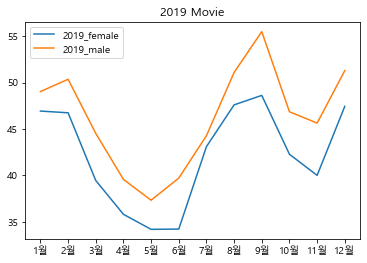

In [157]:
# 2019년 영화 성별 월별 평균 그래프
plt.plot(pd.DataFrame(movie_f_month_2019, index=[str(i)+'월' for i in range(1, 13)]))
plt.plot(pd.DataFrame(movie_m_month_2019, index=[str(i)+'월' for i in range(1, 13)]))
plt.legend(['2019_female', '2019_male'])
plt.title('2019 Movie')

Text(0.5, 1.0, '2020 Movie')

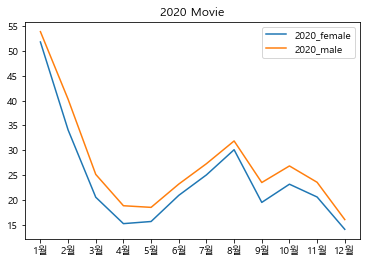

In [158]:
# 2020년 영화 성별 월별 평균 그래프
plt.plot(pd.DataFrame(movie_f_month_2020, index=[str(i)+'월' for i in range(1, 13)]))
plt.plot(movie_m_month_2020)
plt.legend(['2020_female', '2020_male'])
plt.title('2020 Movie')

Text(0.5, 1.0, '2021 Movie')

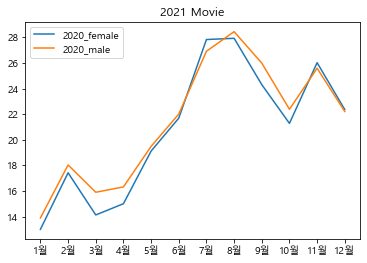

In [159]:
# 2021년 영화 성별 월별 평균 그래프
plt.plot(pd.DataFrame(movie_f_month_2021, index=[str(i)+'월' for i in range(1, 13)]))
plt.plot(movie_m_month_2021)
plt.legend(['2020_female', '2020_male'], loc=2)
plt.title('2021 Movie')

Text(0.5, 1.0, '2022 Movie')

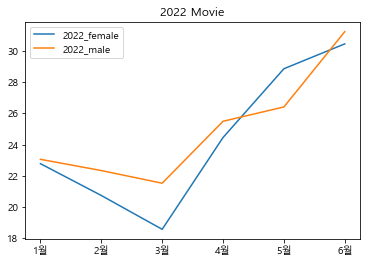

In [161]:
# 2022년 영화 성별 월별 평균 그래프
plt.plot(pd.DataFrame(movie_f_month_2022, index=[str(i)+'월' for i in range(1, 7)]))
plt.plot(movie_m_month_2022)
plt.legend(['2022_female', '2022_male'])
plt.title('2022 Movie')

In [138]:
# x축 라벨 만드는 함수
def x():
    x=[]
    for i in range(3):
        for j in range(1, 13):
            x.append(str(j)+'월')
    for i in range(1, 7):
        x.append(str(i)+'월')
    
    return x

print(x())

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월', '1월', '2월', '3월', '4월', '5월', '6월']


Text(0.5, 1.0, '2019~2022년 Movie')

<Figure size 432x288 with 0 Axes>

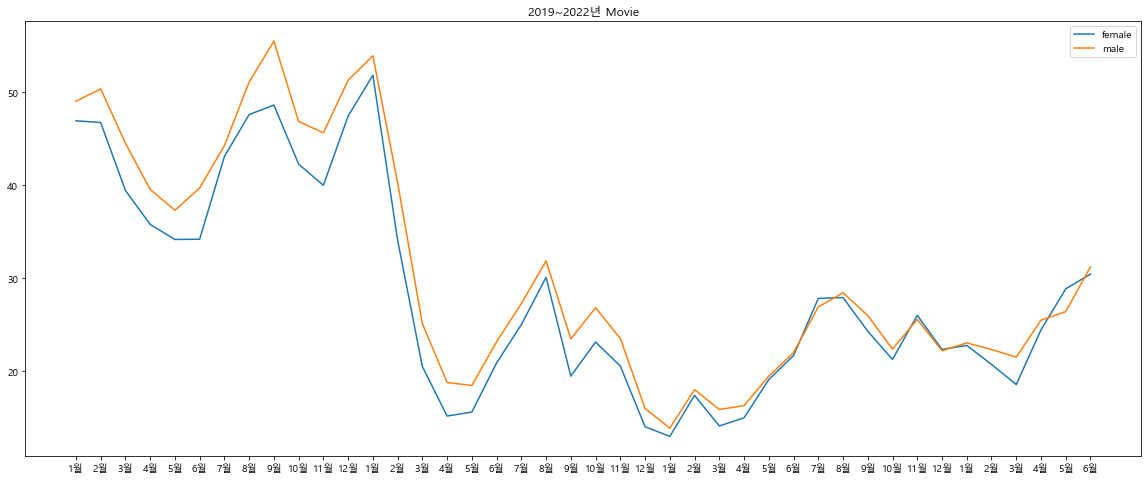

In [181]:
# 2019년~2022년 영화 월별 평균
# '넷플릭스 영화'로 검색한 결과
plt.figure()
plt.figure(figsize=(20, 8))
plt.plot(movie_f)
plt.plot(movie_m)
plt.xticks(np.arange(42), x())
plt.legend(['female', 'male'], loc=1)
plt.title('2019~2022년 Movie')

#### 보통 영화는 재밌는 게 개봉을 해도 OTT에 바로 올라오는 게 아니니까 재미있는 영화가 개봉했다고 해서 검색량이 늘어나는 건 아니었다.
#### 영화는 공휴일이나 휴가철의 영향을 많이 받은 것으로 보였음.
#### 크리스마스와 설이 있는 12월과 1월, 방학과 휴가철이 있는 7,8월에 증가하는 양상을 보임.

Text(0.5, 1.0, '2019 Drama')

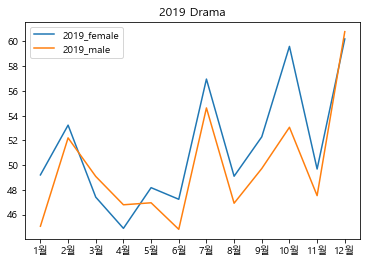

In [140]:
# 2019년 드라마 성별 월별 평균 그래프
plt.plot(pd.DataFrame(drama_f_month_2019, index=[str(i)+'월' for i in range(1, 13)]))7
plt.plot(pd.DataFrame(drama_m_month_2019, index=[str(i)+'월' for i in range(1, 13)]))
plt.legend(['2019_female', '2019_male'])
plt.title('2019 Drama')

Text(0.5, 1.0, '2020 Drama')

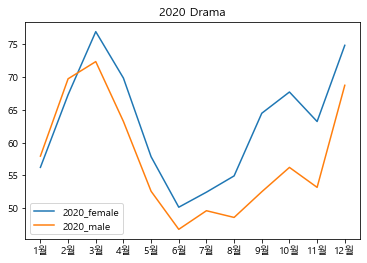

In [141]:
plt.plot(pd.DataFrame(drama_f_month_2020, index=[str(i)+'월' for i in range(1, 13)]))
plt.plot(pd.DataFrame(drama_m_month_2020, index=[str(i)+'월' for i in range(1, 13)]))
plt.legend(['2020_female', '2020_male'])
plt.title('2020 Drama')

Text(0.5, 1.0, '2021 Drama')

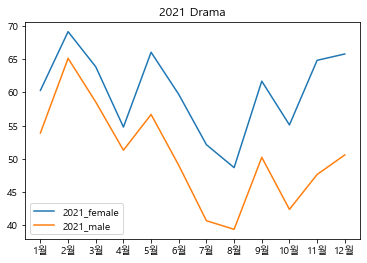

In [142]:
plt.plot(pd.DataFrame(drama_f_month_2021, index=[str(i)+'월' for i in range(1, 13)]))
plt.plot(pd.DataFrame(drama_m_month_2021, index=[str(i)+'월' for i in range(1, 13)]))
plt.legend(['2021_female', '2021_male'])
plt.title('2021 Drama')

Text(0.5, 1.0, '2022 Drama')

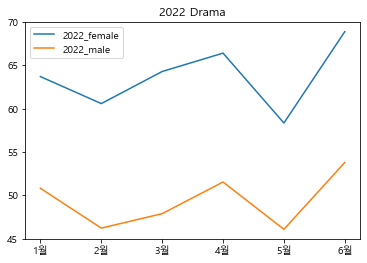

In [143]:
plt.plot(pd.DataFrame(drama_f_month_2022, index=[str(i)+'월' for i in range(1, 7)]))
plt.plot(pd.DataFrame(drama_m_month_2022, index=[str(i)+'월' for i in range(1, 7)]))
plt.legend(['2022_female', '2022_male'])
plt.title('2022 Drama')

Text(0.5, 1.0, '2019~2022 Drama')

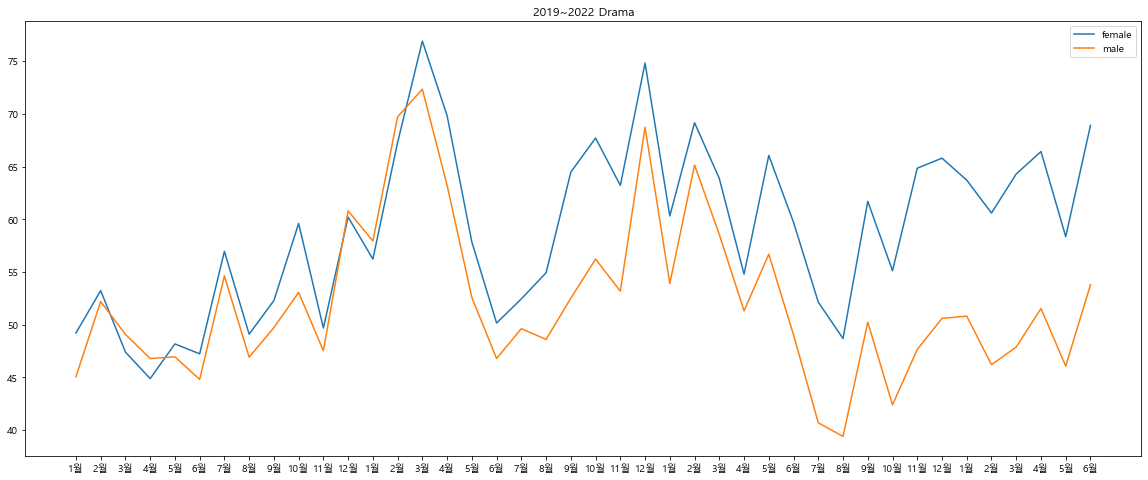

In [144]:
# 2019년~2022년 드라마 월별 평균
plt.figure(figsize=(20, 8))
plt.plot(drama_f)
plt.plot(drama_m)
plt.legend(['female', 'male'])
plt.xticks(np.arange(42), x_label())
plt.title('2019~2022 Drama')

#### 드라마 또한 영화와 비슷하게 날짜의 영향을 받은 것으로 생각됨
#### 2020년 3월 ~ 5월 : 슬기로운 의사생활, 부부의 세계들을 방영했지만 검색량은 떨어짐
#### 인기 있는 드라마를 방영 중이면 검색량이 증가할 것으로 생각했는데 큰 상관은 없는 것으로 보인다.

Text(0.5, 1.0, '2019~2022 Entertainment')

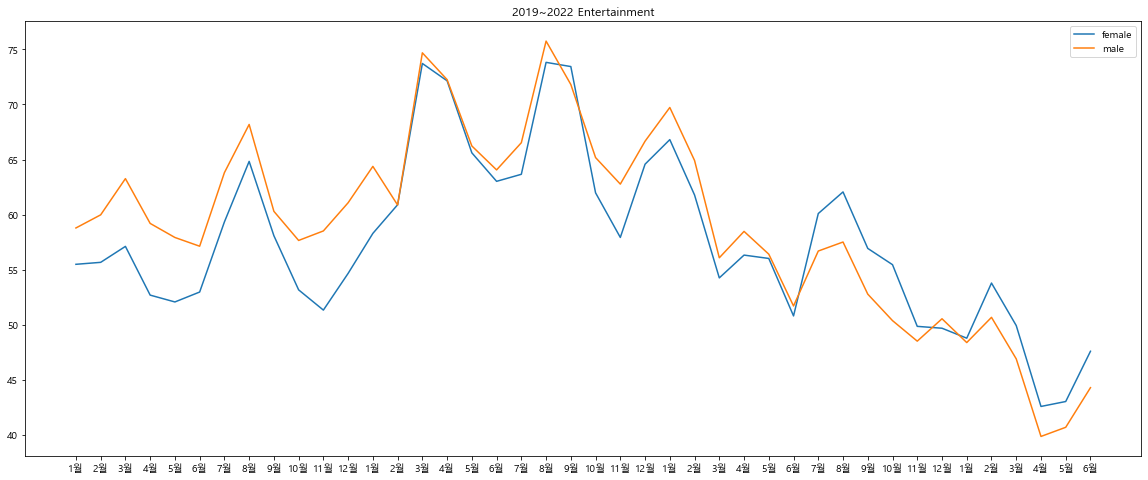

In [163]:
# 2019년~2022년 예능 월별 평균
plt.figure(figsize=(20, 8))
plt.plot(enter_f)
plt.plot(enter_m)
plt.xticks(np.arange(42), x_label())
plt.legend(['female', 'male'])
plt.title('2019~2022 Entertainment')

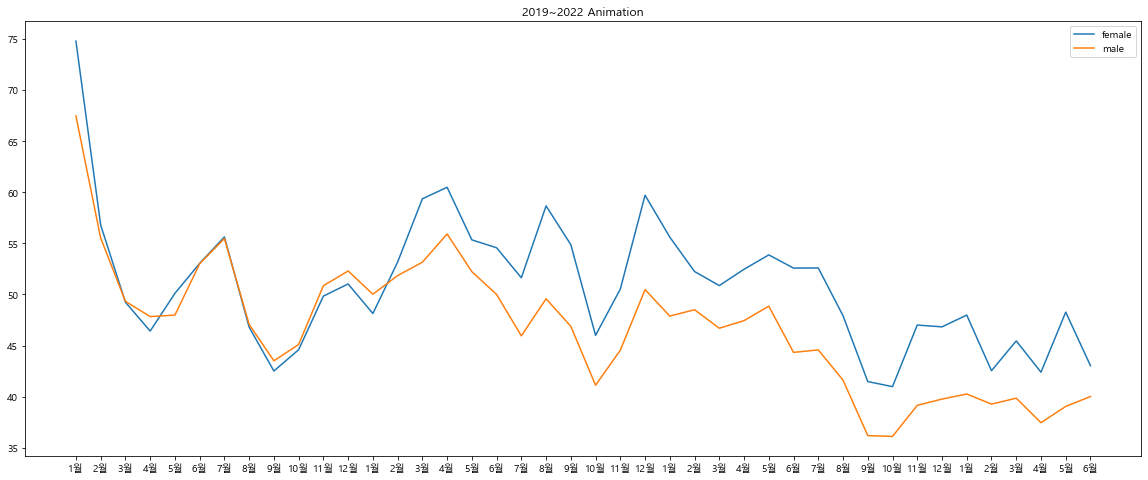

In [165]:
# 2019년~2022년 애니메이션 월별 평균
plt.figure(figsize=(20, 8))
plt.plot(ani_f)
plt.plot(ani_m)
plt.legend(['female', 'male'])
plt.title('2019~2022 Animation')
plt.xticks(np.arange(42), x())
plt.show()

Text(0.5, 1.0, '2019년~2022년 연령대별')

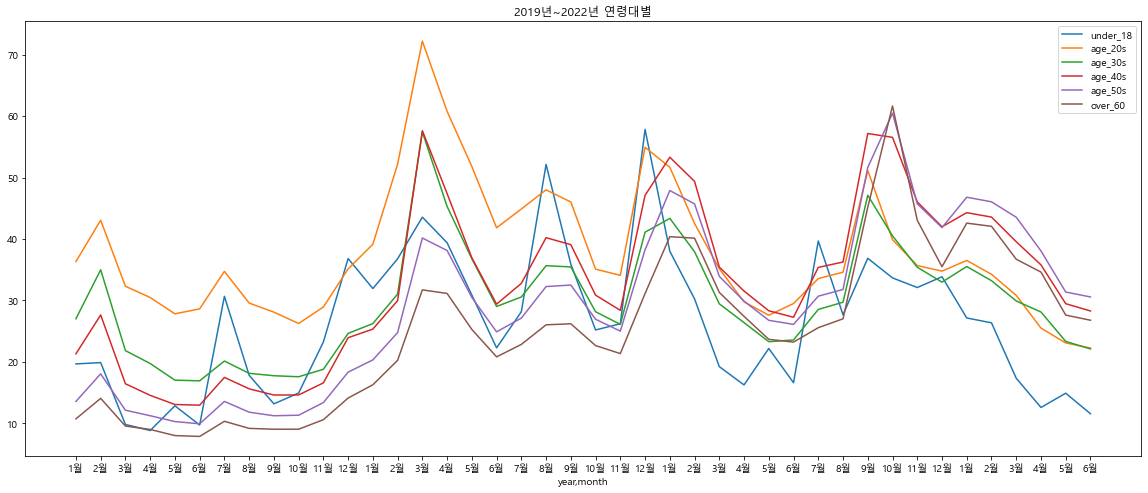

In [182]:
# 2019~2022년 연령대별 월별 평균
age_group.plot(figsize=(20, 8))
plt.xticks(np.arange(42), x_label())
plt.title('2019년~2022년 연령대별')

#### 연령대 또한 장르와 비슷하게 공휴일이나 명절에 많이 증가하는 양상을 보였고,
#### 장르와 다르게 넷플릭스에 유명한 드라마나 예능이 나올 때마다 검색량이 증가하는 것으로 보였음.
#### [ 2019년 2월에는 킹덤,
####   2019년 7월 기묘한 이야기 시즌3,
####   2020년 3월에는 킹덤2,
####   2020년 8월은 휴가철과 방학 때문인듯하고
####   2020년 12월에는 스위트홈
####   2021년 9월에는 오징어게임과 DP,
####   2021년 12월에는 솔로지옥, 지금 우리 학교는 ]
#### 등으로 인해 검색량이 증가한 것으로 생각됨.

## =-=-=-=-=-=-=-=-=-=-=-=-= 넷플릭스 총 분석 결과 =-=-=-=-=-=-=-=-=-=-=-=-=

넷플릭스는 오리지널로 인해 지속적인 관심을 받고 있으니 앞으로의 방향에 대해 큰 고민은 없음.

그러나 가격적인 면에서 프로모션이 없으니 특별한 넷플릭스 오리지널이 없어서 관심도가 줄었을 때 가격 프로모션을 진행하면
좀 더 많은 고객을 유치할 수 있을 것으로 예상됨.